In [37]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

### Data preparation

In [38]:
raw_data=datasets.load_breast_cancer()
raw_data['DESCR'].split('\n')

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry ',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        largest values) of these features were c

In [39]:
df_cancer_ip=pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
df_cancer_ip.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df_cancer_ip.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


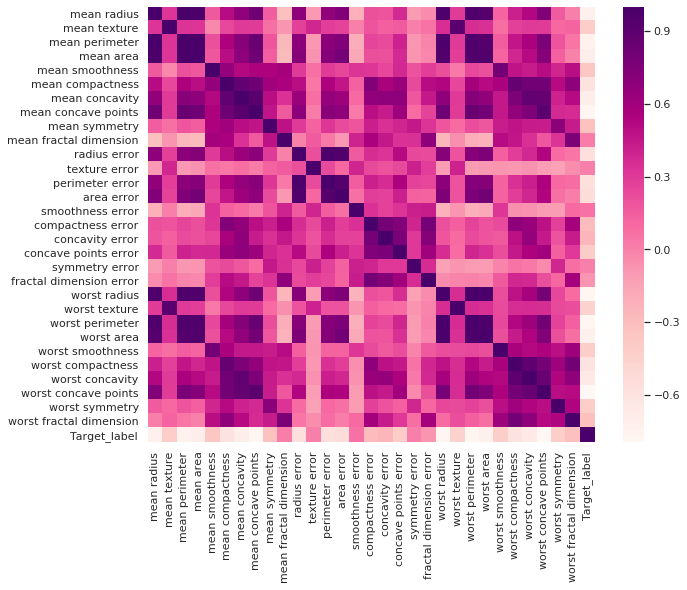

In [41]:
df_corr_features=df_cancer_ip.copy()
df_corr_features['Target_label']=raw_data['target']

plt.figure(figsize=(10,8))
ax=sns.heatmap(df_corr_features.corr(), cmap='RdPu')
y_max, y_min=ax.get_ylim()
plt.ylim(y_max+0.5, y_min-0.5)
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale.fit(df_cancer_ip)
df_scaled=std_scale.transform(df_cancer_ip)
df_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [43]:
raw_data.keys()

In [72]:
raw_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

### PCA

In [44]:
from sklearn.decomposition import PCA

pca_2d=PCA(n_components=2)
pca_2d.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
print(pca_2d.explained_variance_ratio_, pca_2d.singular_values_)

[0.44272026 0.18971182] [86.93235745 56.90677266]


In [46]:
pca_cancer=pca_2d.transform(df_scaled)
features_list=['x_val', 'y_val']
df_pca_transform=pd.DataFrame(pca_cancer, columns=features_list)
df_pca_transform.head()

,x_val,y_val
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [47]:
df_temp_corr=df_pca_transform.copy()
df_temp_corr['target']=raw_data['target']
df_temp_corr.corr().round(3)

,x_val,y_val,target
x_val,1.000,-0.000,-0.785
y_val,-0.000,1.000,0.188
target,-0.785,0.188,1.000


In [77]:
def show_2d_scaled_data(df_scaled_in):

    plt.figure(figsize=(8,8))

    colors_list=['purple', 'goldenrod']
    cmap_list=ListedColormap(colors_list)
    y=raw_data['target']

    plt.scatter(df_scaled_in.iloc[:,0], df_scaled_in.iloc[:,1], c=y, cmap=cmap_list, alpha=0.7)
    plt.xlabel('Feature-1')
    plt.ylabel('Feature-2')
    plt.title('2D Dataset scaling', fontsize=14)

    legend_list=[]
    for r, cancer_type in enumerate(raw_data['target_names']):
        user_patch = mpatches.Patch(color=colors_list[r], label=cancer_type)
        legend_list.append(user_patch)

    plt.legend(handles=legend_list, loc='best')
    plt.show()

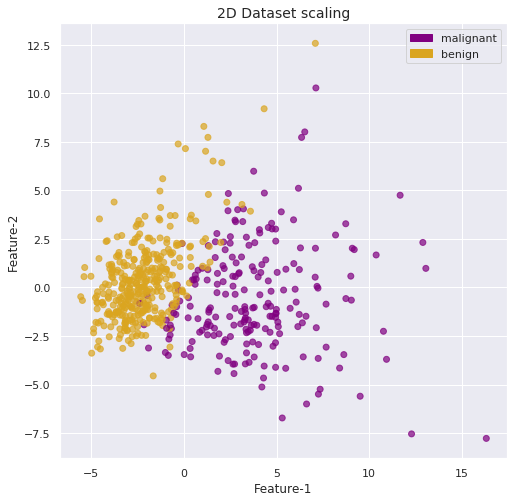

In [78]:
show_2d_scaled_data(df_pca_transform)

### MDS

In [49]:
from sklearn.manifold import MDS

mds_2d=MDS(n_components=2)
mds_cancer=mds_2d.fit_transform(df_scaled)

In [50]:
df_mds_transform=pd.DataFrame(mds_cancer, columns=features_list)
df_mds_transform.head()

,x_val,y_val
0,-4.276003,-10.023973
1,3.685846,-3.397502
2,-0.220483,-6.158155
3,-12.669101,-6.276746
4,2.452542,-5.261878


In [51]:
df_temp_corr=df_mds_transform.copy()
df_temp_corr['target']=raw_data['target']
df_temp_corr.corr().round(3)

,x_val,y_val,target
x_val,1.000,0.087,0.047
y_val,0.087,1.000,0.792
target,0.047,0.792,1.000


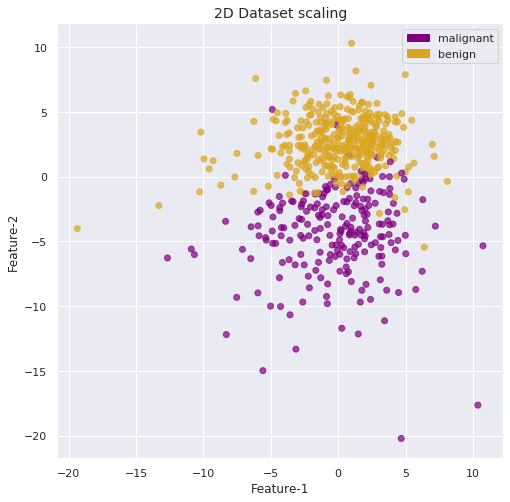

In [79]:
show_2d_scaled_data(df_mds_transform)

### TSNE

In [53]:
from sklearn.manifold import TSNE

tsne_2d=TSNE(n_components=2)
tsne_cancer=tsne_2d.fit_transform(df_scaled)

In [54]:
df_tsne_transform=pd.DataFrame(tsne_cancer, columns=features_list)
df_tsne_transform.head()

,x_val,y_val
0,-30.051514,-11.711152
1,-28.141794,3.392461
2,-30.673073,-5.886823
3,-20.081154,-3.643048
4,-31.838118,4.010406


In [55]:
df_temp_corr=df_tsne_transform.copy()
df_temp_corr['target']=raw_data['target']
df_temp_corr.corr().round(3)

,x_val,y_val,target
x_val,1.000,0.383,0.815
y_val,0.383,1.000,0.263
target,0.815,0.263,1.000


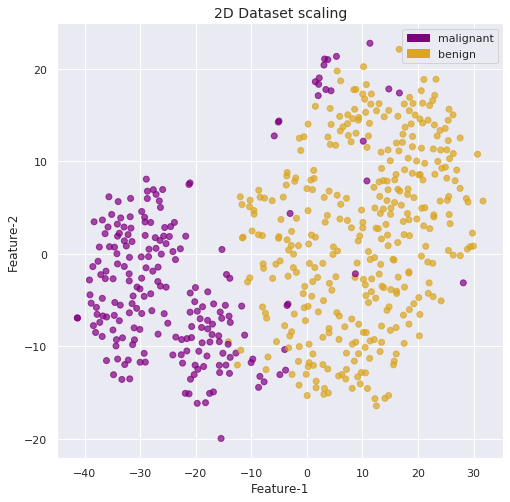

In [80]:
show_2d_scaled_data(df_tsne_transform)